EDX  
DSE200x  
[Python for Data Science](https://courses.edx.org/courses/course-v1:UCSanDiegoX+DSE200x+1T2018/course/)  
2018-04-13

_Course Notes_

Introduction
===================

10 week course covering use of:

* python
* jupyter notebooks
* pandas
* numpy
* matplotlib
* git
* scikit-learn
* nltk

Learn about:

* Finding answers in large datasets
* Machine Learning Techniques
* Natural Language Porcessing tools

Lecturers: 

* Ilkay Altintas, chief Science Data Officer at San Diego Supercomputer Center.
* Leo Porter, assistant teaching professor in the Computer Science and Engineering Dept. at UC San Diego

Learning tools used by data scientists: Python, Numpy, Pandas, Jupyter, Scikit Learn and more.

For most topics, we'll be using real-world data to explore and analyse real-world problems. e.g. To improve the actions of emergency responders, environmental impact and personalising services for customers.

Week 1: Getting Started
=======================

Getting Value out of Data
-------------------------

Data science turns data into insight or actions.

Data science is the basis for empirical research, the data informs hypotheses.

Insight is extracted from a combination of exploratory analysis and modelling.

Data science combines computer science, maths, and business or science. It requires domain expertise, statistics and computing skill as well as machine learning, modelling and data visualisation.

Few data scientists have expertise in all these things.

Python has libraries of data management, analytical processing and visualisation. It also has Jupyter Notebooks to help sharing reproducable data analysis.

Case Study: Football
--------------------

[Kaggle](https://www.kaggle.com/) is a data scientist website with a variety of datasets, including football datasets.

Data analysis requires asking questions. For example:

* How to find players with similar attributes?
* How do I use this to form strong teams?
* Why do I want to form strong teams?

Always ask: why an I doing data science for this problem? What insights do I expect?

For the football study we might want to find which traits impact on a players performance the most, so that a coach could use that information to guide training. Our goal is to use the data to find the kinds of insights that lead to actions.

Data analysis generally comprises of 5 steps regardless of what is being analysed:

1. Acquire data
2. Prepare/clean up
3. Analyse and Explore
4. Presentation & reporting
5. Generate actions

### Acquire Data

In our football example, the data was gathered from across the internet, and processed to make ready for analysis.

The set includes data on scores, line-up, team formation, events, betting odds and players and team attributes.

Download the data from: <a href="https://www.kaggle.com/hugomathien/soccer">https://www.kaggle.com/hugomathien/soccer and Extract the zip file called "soccer.zip".

Python has methods for reading in data from diverse sources e.g: databases, APIs like twitter, text, sensor data streams. In this case, we are reading in from an sqlite database file.

But first we need to install the sklearn library (we need it for the analysis).

In [1]:
%%capture
# Modules
! pip install --user sklearn

And now we need to import all the libraries we'll be using.

In [2]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from src_files.week1.customplot import *

And now we are ready to import the data.

In [3]:
# Create your connection
cnx = sqlite3.connect('src_files/week1/database.sqlite')
# read in from Player_Attributes table
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

### Explore Data

Now we have imported the data, we need to take a look at what we've got.

In [4]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,183978.0,91989.500000,53110.018250,1.0,45995.25,91989.5,137983.75,183978.0
player_fifa_api_id,183978.0,165671.524291,53851.094769,2.0,155798.00,183488.0,199848.00,234141.0
player_api_id,183978.0,135900.617324,136927.840510,2625.0,34763.00,77741.0,191080.00,750584.0
overall_rating,183142.0,68.600015,7.041139,33.0,64.00,69.0,73.00,94.0
potential,183142.0,73.460353,6.592271,39.0,69.00,74.0,78.00,97.0
crossing,183142.0,55.086883,17.242135,1.0,45.00,59.0,68.00,95.0
finishing,183142.0,49.921078,19.038705,1.0,34.00,53.0,65.00,97.0
heading_accuracy,183142.0,57.266023,16.488905,1.0,49.00,60.0,68.00,98.0
short_passing,183142.0,62.429672,14.194068,3.0,57.00,65.0,72.00,97.0
volleys,181265.0,49.468436,18.256618,1.0,35.00,52.0,64.00,93.0


### Data Clean Up

Check and remove any missing data.

In [6]:
df.isnull().any().any(), df.shape

(True, (183978, 42))

In [7]:
df.isnull().sum(axis=0)

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

Now clear out those null rows.

In [8]:
rows, cols = df.shape
# Drop the NULL rows
df = df.dropna()
print("Deleted rows:")
rows - df.shape[0] , df.shape[0]

Deleted rows:


(3624, 180354)

Since we have deleted some rows, it may a good idea to re-index the dataframe.

And instead of looking at same top 10 lines every time, we can shuffle them so we get to see different random sample on top. This way, we make sure the data is not in any particular order when we try sampling from it.

In [9]:
#Shuffle the rows of df so we get a distributed sample when we display top few rows
df = df.reindex(np.random.permutation(df.index))

### Analysis

Python has libraries for analysing data, that can help you quickly explore: summarise statistics.

Seem to be suggesting the analysis stage can be catergorised as types of 'learning':

* Supervised Learning
* Unsupervised learning
* Semi-supervised learning

This can include:

* Dimensionality reduction
* Clustering
* Regression

The scikit-learn library provides tools for machine learning.

An example is 'feature selection'. In football, what features are critical to performance. And if you are grouping players, what feature do you use to select groupings.

Narrowing the features has benefits of simplifying the models and making things easier to interpret. It also makes training much faster, and easier to generalise.

K-means in a clustering algorithm, which groups players into similar sets.

### Pearson Correlation

Pearson correlation (aka Pearson's r, Product-moment correlation coefficient, Bivariate correlation) is a measure of the linear correlation between two variables. It ranges from -1 to 1 with 0 implying no correlation.

For a population:

> &rho;X,Y = cov(X, Y)/&sigma;X&sigma;Y

Where cov = covariance and &sigma; = standard deviation.

The example applies a Pearson Correlation to two columns to identify the correlation between a players overall rating and number of penalties (I've no idea what 'penalties' refers to here):

In [10]:
df['overall_rating'].corr(df['penalties'])

0.39271510791118835

So rating is positively correlated with overall_rating to the value of 0.39 (apparently not very strong).

Instead of checking each feature individually, we can quickly list correlations for a number of columns and plot the results:

In [11]:
features = ['potential',  'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']
correlations = [df['overall_rating'].corr(df[f]) for f in features]

In [12]:
len(features), len(correlations)

(34, 34)

That's a bit long to read, so we can display on a graph instead.

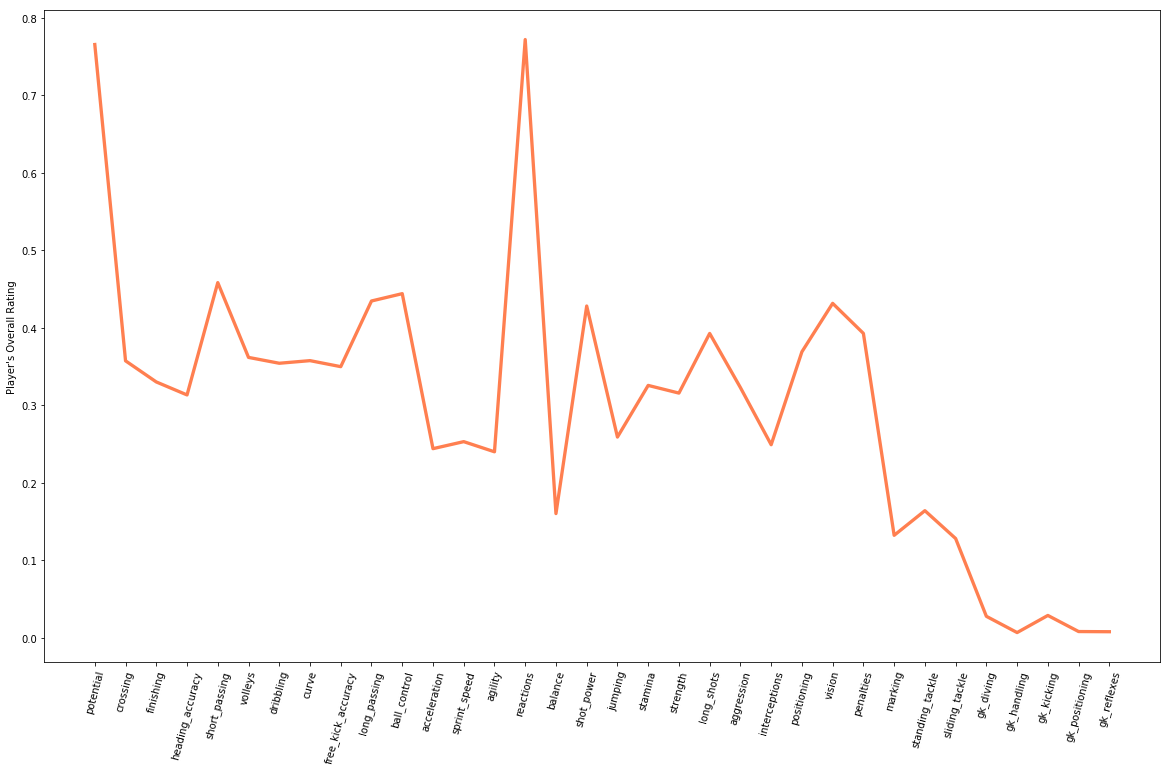

In [13]:
# create a function for plotting a dataframe with string columns and numeric values
def plot_dataframe(df, y_label):  
    color='coral'
    fig = plt.gcf()
    fig.set_size_inches(20, 12)
    plt.ylabel(y_label)

    ax = df.correlation.plot(linewidth=3.3, color=color)
    ax.set_xticks(df.index)
    ax.set_xticklabels(df.attributes, rotation=75); #Notice the ; (remove it and see what happens !)
    plt.show()
    
df_cor = pd.DataFrame({'attributes': features, 'correlation': correlations})
plot_dataframe(df_cor, 'Player\'s Overall Rating')

Or we can quickly sort the table and see the top 5 features that correlate with rating.

In [14]:
df_cor.sort_values(['correlation'], ascending = False, inplace = True)
df_cor['position'] = range(1, df_cor.shape[0]+1)
df_cor.head()

,attributes,correlation,position
14,reactions,0.771856,1
0,potential,0.765435,2
4,short_passing,0.458243,3
10,ball_control,0.443991,4
9,long_passing,0.434525,5


### Clustering

[k-means](https://en.wikipedia.org/wiki/K-means_clustering) clustering is attempts to partition n values (observations) into k clusters, where each observation belongs to the cluster with the nearest mean.

It is is computationally intensive but there are heuristic algorithms that can quickly converge on a local optimum. A k-means algorithm is available from the sklearn library.

Can we group similar players based on the features in the data?

**Note:** Generally, someone with domain knowledge needs to define which features. We could also want to select features with highest correlation with overall_rating. However, it does not guarantee best outcome always as we are not sure if the top five features are independent.

In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

# Define the feature we want to use
select5features = ['gk_kicking', 'potential', 'marking', 'interceptions', 'standing_tackle']
# Generate a new dataframe by selecting the features you just defined
df_select = df[select5features].copy(deep=True)
df_select.head()

,gk_kicking,potential,marking,interceptions,standing_tackle
3740,11.0,71.0,74.0,73.0,73.0
27266,6.0,75.0,25.0,25.0,25.0
5909,11.0,79.0,13.0,27.0,16.0
118144,7.0,79.0,80.0,75.0,81.0
140683,7.0,70.0,20.0,20.0,25.0


In [16]:
# Perform scaling on the dataframe containing the features
data = scale(df_select)
# Define number of clusters
noOfClusters = 4
# Train a model
model = KMeans(init='k-means++', n_clusters=noOfClusters, n_init=20).fit(data)

We can check how the clusters have been distributed:

In [17]:
pd.value_counts(model.labels_, sort=False)

0    23777
1    50475
2    50199
3    55903
dtype: int64

In [18]:
# For plotting the graph inside the notebook itself, we use the following command
%matplotlib inline
p = pd_centers(featuresUsed=select5features, centers=model.cluster_centers_)
p

,gk_kicking,potential,marking,interceptions,standing_tackle,prediction
0,1.920631,0.037763,-1.111727,-0.653150,-1.200879,0
1,-0.040334,0.704472,1.027857,0.982552,1.030289,1
2,-0.337580,-0.843426,0.548378,0.407497,0.550929,2
3,-0.477098,0.105698,-0.947597,-0.975163,-0.914172,3


/home/ubuntu/workspace/Python for Data Science/src_files/week1/customplot.py:31: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  parallel_coordinates(data, 'prediction', color = my_colors, marker='o')


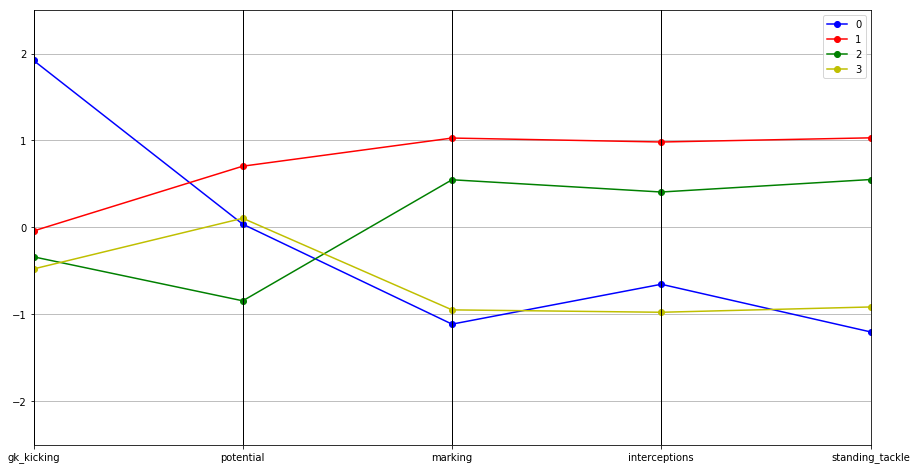

In [19]:
parallel_plot(p)

How Does Data Science Happen
----------------------------

The first step in the process is to define what you are trying to do, and assess the situation. Might look at risks, costs, benefits, constraints and resources.

Then you need to define your goals and success criteria. 

To re-iterate, there are generally 5 steps:

1. Acquire data
2. Explore, Prepare & clean up data
3. Analyse and explore further
4. Presentation & reporting
5. Generate actions

These steps may be iterated over multiple times.

Once you've identified a source of data, it has to be prepared for analysis. This generally involves two steps. First you explore the data. This is similar to doing basic analysis. You might look at correlation, trends and outliers. You want to identify errors and missing data.

With a good understanding of the data, you can then clean it up and address quality issues (often domain knowledge is necessary to do this well). 

Then you mung the data into format necessary for analysis. This may include scaling, transformation and aggregation, filtering and dimensionality reduction.

Scaling involves changing values to different ranges, to prevent a certain value from dominating other values. e.g. you might change absolute values to values between zero and one.

Reducing the dimensionality makes analysis simpler for data sets with large number of features. A common technique is called _principal component analysis_.

### Analyse

Data analysis involves building a model from your _input data_, generating _output data_. Techniques vary depending on data and goals, but can be categorised as:

* Classification - predict category of input data
* Regression - predict a numeric value
* Clustering - organise similar things
* Associative analysis - identify rules to capture associations between items or events (when events occur together)
* Graph analysis - when data can be represented as node and links (e.g. maps, social networks).

The model can be validated by applying new data samples and evaluating the results.

### Reporting

Look at results of analysis and decide what to present. What offers the biggest value. (look back at aims)

Results may be inconclusive, and require additional analysis.

Results can be presented visually on graphs like scatter plots, heat maps...

### Actions

Data science is only useful if it can be used to generate actions.